In [1]:
#Compare Algorithms
import numpy
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from imblearn.under_sampling import RandomUnderSampler
# fix random seed for reproducibility
import math

import warnings
warnings.filterwarnings("ignore")
numpy.random.seed(7)

In [2]:
#Importing the Train Data 
import pandas as pd
df_spiral = pd.read_csv("D:\/Spiral_HandPD.csv")
df_Meander = pd.read_csv("D:\/Meander_HandPD.csv")
print(df_spiral.columns)
print(df_Meander.columns)
print(df_spiral.shape)
print(df_Meander.shape)

Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ET_HT',
       'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ST_HT',
       'MIN_BETWEEN_ST_HT', 'STD_DEVIATION_ST_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT'],
      dtype='object')
(368, 16)
(368, 16)


In [3]:
Y_df_S = df_spiral.iloc[:,3]
Y_df_M = df_Meander.iloc[:,3]
print(Y_df_S)
Y_df_S = Y_df_S.replace(2, 0)
print(Y_df_S)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
338    2
339    2
340    2
341    2
342    2
343    2
344    2
345    2
346    2
347    2
348    2
349    2
350    2
351    2
352    2
353    2
354    2
355    2
356    2
357    2
358    2
359    2
360    2
361    2
362    2
363    2
364    2
365    2
366    2
367    2
Name: CLASS_TYPE, Length: 368, dtype: int64
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
338    0
339    0
340    0
341    0
342    0
343    0
344    0
345    0
346    0
347    0
348    0
349    0
350    0
351    0
35

In [4]:
Y_df_S = df_spiral.iloc[:,3]
Y_df_M = df_Meander.iloc[:,3]
print(Y_df_S)
Y_df_M = Y_df_M.replace(2, 0)
print(Y_df_M)

#IMPORTANT TO NOTE:
# The Y_S=1, represents the healthy subject and Y_S=0, represents the PD subject.
# Becuase Healthy Subjects are 18 and PD patients are 74.
#So, healthy spiral samples are 18x4 = 72, As we have 4 spirals from each subject. thus, Y_S.sum() might be 74.
print(Y_S.sum())

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
338    2
339    2
340    2
341    2
342    2
343    2
344    2
345    2
346    2
347    2
348    2
349    2
350    2
351    2
352    2
353    2
354    2
355    2
356    2
357    2
358    2
359    2
360    2
361    2
362    2
363    2
364    2
365    2
366    2
367    2
Name: CLASS_TYPE, Length: 368, dtype: int64
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
338    0
339    0
340    0
341    0
342    0
343    0
344    0
345    0
346    0
347    0
348    0
349    0
350    0
351    0
35

NameError: name 'Y_S' is not defined

In [5]:
#df_spiral = df_spiral.drop('_ID_EXAM', 1) 
X_df_S = df_spiral.iloc[:, 7:16]
X_df_M = df_Meander.iloc[:, 7:16]
print(X_df_S.columns)
print(X_df_M.columns)
print(X_df_S.shape)
print(X_df_M.shape)
print(Y_df_S.shape)
print(Y_df_M.shape)

Index(['RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
Index(['RMS', 'MAX_BETWEEN_ST_HT', 'MIN_BETWEEN_ST_HT', 'STD_DEVIATION_ST_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT'],
      dtype='object')
(368, 9)
(368, 9)
(368,)
(368,)


In [6]:
X_S = numpy.array(X_df_S)
X_M = numpy.array(X_df_M)
Y_S = numpy.array(Y_df_S)
Y_M = numpy.array(Y_df_M)

print(X_S.shape)
print(X_M.shape)
print(Y_S.shape)
print(Y_M.shape)
print(Y_M)

(368, 9)
(368, 9)
(368,)
(368,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Exp: Highlighting Biasedness in Models due to Imbalance Data

In [11]:
from sklearn.model_selection import StratifiedKFold

Folds = 5
skf = StratifiedKFold(n_splits=Folds)


TP =0
TN=0
FP=0
FN=0
Net_Acc=0


for train_index, test_index in skf.split(X_M, Y_M):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_M[train_index], X_M[test_index]
    Y_train, Y_test = Y_M[train_index], Y_M[test_index]
    
    model = LinearDiscriminantAnalysis()
    #model = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
    #model = DecisionTreeClassifier(random_state=3)
    #model = GaussianNB()
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    Acc = accuracy_score(Y_test, y_pred)
    
    k=0
    while (k<len(y_pred)):
        if((y_pred[k]==Y_test[k]) and (Y_test[k]==0)): # PD patiets have 0 label.
            TP = TP+1
        if((y_pred[k]==Y_test[k]) and (Y_test[k]==1)):
            TN = TN+1
        k = k+1
    #TN, FP, FN, TP = confusion_matrix(Y_test, y_pred).ravel()
    Net_Acc = Net_Acc+Acc
    
FN=(74*4)-TP      #PD patients are 74. Each patient has 4 samples. Thus, total of 74x4=296 samples. PD patients have 0 label
FP = (18*4)-TN
Sen = TP/(TP+FN)*100
Spec = TN/(TN+FP)*100
print("Unbalance Acc of 5Folds =", (Net_Acc*100)/5)
print("Balanc_Acc of 5Folds =", (Sen+Spec)/2)
print("Sensitivity = ", TP/(TP+FN)*100)
print("Specificity = ", TN/(TN+FP)*100)
print("TP=", TP)
print("TN=", TN)
print("FP=", FP)
print("FN=", FN)
print("F-Score =", 2*TP/(2*TP+FP+FN))
print("MCC =", ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

Unbalance Acc of 5Folds = 83.99693940515859
Balanc_Acc of 5Folds = 64.80855855855856
Sensitivity =  96.28378378378379
Specificity =  33.33333333333333
TP= 285
TN= 24
FP= 48
FN= 11
F-Score = 0.9062003179650239
MCC = 0.40049652070918895


# Impact of Balancing Data

In [15]:
from sklearn.model_selection import StratifiedKFold

Best_Acc=0
skf = StratifiedKFold(n_splits=5)

TP =0
TN=0
FP=0
FN=0
Net_Acc=0

for train_index, test_index in skf.split(X_M, Y_M):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_M[train_index], X_M[test_index]
    Y_train, Y_test = Y_M[train_index], Y_M[test_index]

    ##################Balancing the Training Process########################
    rus = RandomUnderSampler(random_state=0)
    X_train_Bal, Y_train_Bal = rus.fit_resample(X_train, Y_train)

    #model = LinearDiscriminantAnalysis()
    #model = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
    #model = DecisionTreeClassifier(random_state=3)
    model = GaussianNB()
    model.fit(X_train_Bal, Y_train_Bal)
    y_pred = model.predict(X_test)
    
    Acc = accuracy_score(Y_test, y_pred)

    k=0
    while (k<len(y_pred)):
        if((y_pred[k]==Y_test[k]) and (Y_test[k]==0)): # PD patiets have 0 label.
            TP = TP+1
        if((y_pred[k]==Y_test[k]) and (Y_test[k]==1)):
            TN = TN+1
        k = k+1
    #TN, FP, FN, TP = confusion_matrix(Y_test, y_pred).ravel()
    Net_Acc = Net_Acc+Acc
FN=(74*4)-TP      #PD patients are 74. Each patient has 4 samples. Thus, total of 74x4=296 samples. PD patients have 0 label
FP = (18*4)-TN
Sen = TP/(TP+FN)*100
Spec = TN/(TN+FP)*100

print("Unbalance Acc of 5Folds =", (Net_Acc*100)/5)
print("Balanc_Acc of 5Folds =", (Sen+Spec)/2)
print("Sensitivity = ", TP/(TP+FN)*100)
print("Specificity = ", TN/(TN+FP)*100)
print("TP=", TP)
print("TN=", TN)
print("FP=", FP)
print("FN=", FN)
print("F-Score =", 2*TP/(2*TP+FP+FN))
print("MCC =", ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

Unbalance Acc of 5Folds = 77.71067505862027
Balanc_Acc of 5Folds = 59.34684684684685
Sensitivity =  89.52702702702703
Specificity =  29.166666666666668
TP= 265
TN= 21
FP= 51
FN= 31
F-Score = 0.8660130718954249
MCC = 0.21289330930385283


# Chi2-Other Models (LDA, DT, GNB)

In [8]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold

Best_Acc=0
Folds=5
K = range(1, 10)
for k in K:
    X_FS = SelectKBest(chi2, k=k).fit_transform(X_M, Y_M)
    print("Size of Selected Subset of Features ============", X_FS.shape)
    

    
    skf = StratifiedKFold(n_splits=Folds)

    TP =0
    TN=0
    FP=0
    FN=0
    Net_Acc=0

    for train_index, test_index in skf.split(X_FS, Y_M):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_FS[train_index], X_FS[test_index]
        Y_train, Y_test = Y_M[train_index], Y_M[test_index]

        ##################Balancing the Training Process########################
        rus = RandomUnderSampler(random_state=0)
        X_train_Bal, Y_train_Bal = rus.fit_resample(X_train, Y_train)

        
        model = LinearDiscriminantAnalysis()
        #model = KNeighborsClassifier(n_neighbors = 11, metric = 'euclidean')
        #model = DecisionTreeClassifier(random_state=3)
        #model = GaussianNB() # Results of GNB are not stable
        model.fit(X_train_Bal, Y_train_Bal)
        y_pred = model.predict(X_test)
        
        Acc = accuracy_score(Y_test, y_pred)

        k=0
        while (k<len(y_pred)):
            if((y_pred[k]==Y_test[k]) and (Y_test[k]==0)): # PD patiets have 0 label.
                TP = TP+1
            if((y_pred[k]==Y_test[k]) and (Y_test[k]==1)):
                TN = TN+1
            k = k+1
        #TN, FP, FN, TP = confusion_matrix(Y_test, y_pred).ravel()
        Net_Acc = Net_Acc+Acc
    FN=(74*4)-TP      #PD patients are 74. Each patient has 4 samples. Thus, total of 74x4=296 samples. PD patients have 0 label
    FP = (18*4)-TN
    Sen = TP/(TP+FN)*100
    Spec = TN/(TN+FP)*100

    print("Unbalance Acc of 5Folds =", (Net_Acc*100)/5)
    print("Balanc_Acc of 5Folds ============================================", (Sen+Spec)/2)
    print("Sensitivity = ", TP/(TP+FN)*100)
    print("Specificity = ", TN/(TN+FP)*100)
    print("TP=", TP)
    print("TN=", TN)
    print("FP=", FP)
    print("FN=", FN)
    print("F-Score =", 2*TP/(2*TP+FP+FN))
    print("MCC =", ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

Size of Selected Subset of Features ============ (368, 1)
Unbalance Acc of 5Folds = 42.65393064297173
Balanc_Acc of 5Folds ============================================ 47.015765765765764
Sensitivity =  39.86486486486486
Specificity =  54.166666666666664
TP= 118
TN= 39
FP= 33
FN= 178
F-Score = 0.5279642058165548
MCC = -0.04813452239749024
Size of Selected Subset of Features ============ (368, 2)
Unbalance Acc of 5Folds = 61.72242379365666
Balanc_Acc of 5Folds ============================================ 63.0442942942943
Sensitivity =  60.810810810810814
Specificity =  65.27777777777779
TP= 180
TN= 47
FP= 25
FN= 116
F-Score = 0.718562874251497
MCC = 0.20834925654928407
Size of Selected Subset of Features ============ (368, 3)
Unbalance Acc of 5Folds = 67.3875848451191
Balanc_Acc of 5Folds ============================================ 66.06606606606607
Sensitivity =  68.24324324324324
Specificity =  63.888888888888886
TP= 202
TN= 46
FP= 26
FN= 94
F-Score = 0.7709923664122137
MCC = 0.262554

# Chi2-SVM Lin

In [21]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold

Best_Acc=0

Folds=5
K = range(1, 10)
for k in K:
    X_FS = SelectKBest(chi2, k=k).fit_transform(X_M, Y_M)
    print("Size of Selected Subset of Features ============", X_FS.shape)
    

    
    
    C = [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.008, 0.01, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10000]
    for c in C:
        skf = StratifiedKFold(n_splits=Folds)

        TP =0
        TN=0
        FP=0
        FN=0
        Net_Acc=0

        for train_index, test_index in skf.split(X_FS, Y_M):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X_FS[train_index], X_FS[test_index]
            Y_train, Y_test = Y_M[train_index], Y_M[test_index]

            ##################Balancing the Training Process########################
            rus = RandomUnderSampler(random_state=0)
            X_train_Bal, Y_train_Bal = rus.fit_resample(X_train, Y_train)

            model =  LinearSVC(C=c, random_state=1)

            model.fit(X_train_Bal, Y_train_Bal)
            y_pred = model.predict(X_test)

            Acc = accuracy_score(Y_test, y_pred)

            k=0
            while (k<len(y_pred)):
                if((y_pred[k]==Y_test[k]) and (Y_test[k]==0)): # PD patiets have 0 label.
                    TP = TP+1
                if((y_pred[k]==Y_test[k]) and (Y_test[k]==1)):
                    TN = TN+1
                k = k+1
            #TN, FP, FN, TP = confusion_matrix(Y_test, y_pred).ravel()
            Net_Acc = Net_Acc+Acc
        FN=(74*4)-TP      #PD patients are 74. Each patient has 4 samples. Thus, total of 74x4=296 samples. PD patients have 0 label
        FP = (18*4)-TN
        Sen = TP/(TP+FN)*100
        Spec = TN/(TN+FP)*100
        
        Bal_Acc = (Sen+Spec)/2
        if Bal_Acc>Best_Acc:
            Best_Acc = Bal_Acc
            print("Unbalance Acc of 5Folds =", (Net_Acc*100)/5)
            print("Balanc_Acc of 5Folds =============================", (Sen+Spec)/2)
            print("C ==============================================", c)
            print("Sensitivity = ", TP/(TP+FN)*100)
            print("Specificity = ", TN/(TN+FP)*100)
            print("TP=", TP)
            print("TN=", TN)
            print("FP=", FP)
            print("FN=", FN)
            print("F-Score =", 2*TP/(2*TP+FP+FN))
            #print("MCC =", ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

Size of Selected Subset of Features ============ (368, 1)
Unbalance Acc of 5Folds = 80.43909663087746
Balanc_Acc of 5Folds ============================= 50.0
C ============================================== 0.0001
Sensitivity =  100.0
Specificity =  0.0
TP= 296
TN= 0
FP= 72
FN= 0
F-Score = 0.891566265060241
Size of Selected Subset of Features ============ (368, 2)
Unbalance Acc of 5Folds = 56.11032950758978
Balanc_Acc of 5Folds ============================= 50.037537537537546
C ============================================== 0.0001
Sensitivity =  59.797297297297305
Specificity =  40.27777777777778
TP= 177
TN= 29
FP= 43
FN= 119
F-Score = 0.686046511627907
Size of Selected Subset of Features ============ (368, 3)
Unbalance Acc of 5Folds = 46.24731580895964
Balanc_Acc of 5Folds ============================= 51.31381381381381
C ============================================== 0.0001
Sensitivity =  42.9054054054054
Specificity =  59.72222222222222
TP= 127
TN= 43
FP= 29
FN= 169
F-Score = 0.5619

# Chi2-SVM(RBF)

In [22]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold

Best_Acc=0

Folds=5
K = range(1, 10)
for k in K:
    X_FS = SelectKBest(chi2, k=k).fit_transform(X_M, Y_M)
    print("Size of Selected Subset of Features ============", X_FS.shape)
    

    
    
    C = [0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10000]
    Gamma = [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.008, 0.01, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10000]
    for c in C:
        for g in Gamma:
            skf = StratifiedKFold(n_splits=Folds)

            TP =0
            TN=0
            FP=0
            FN=0
            Net_Acc=0

            for train_index, test_index in skf.split(X_FS, Y_M):
                #print("TRAIN:", train_index, "TEST:", test_index)
                X_train, X_test = X_FS[train_index], X_FS[test_index]
                Y_train, Y_test = Y_M[train_index], Y_M[test_index]

                ##################Balancing the Training Process########################
                rus = RandomUnderSampler(random_state=0)
                X_train_Bal, Y_train_Bal = rus.fit_resample(X_train, Y_train)

                model = SVC(C=c, kernel = 'rbf', gamma = g, random_state=1)

                model.fit(X_train_Bal, Y_train_Bal)
                y_pred = model.predict(X_test)

                Acc = accuracy_score(Y_test, y_pred)

                k=0
                while (k<len(y_pred)):
                    if((y_pred[k]==Y_test[k]) and (Y_test[k]==0)): # PD patiets have 0 label.
                        TP = TP+1
                    if((y_pred[k]==Y_test[k]) and (Y_test[k]==1)):
                        TN = TN+1
                    k = k+1
                #TN, FP, FN, TP = confusion_matrix(Y_test, y_pred).ravel()
                Net_Acc = Net_Acc+Acc
            FN=(74*4)-TP      #PD patients are 74. Each patient has 4 samples. Thus, total of 74x4=296 samples. PD patients have 0 label
            FP = (18*4)-TN
            Sen = TP/(TP+FN)*100
            Spec = TN/(TN+FP)*100

            Bal_Acc = (Sen+Spec)/2
            if Bal_Acc>Best_Acc:
                Best_Acc = Bal_Acc
                print("Unbalance Acc of 5Folds =", (Net_Acc*100)/5)
                print("Balanc_Acc of 5Folds =============================", (Sen+Spec)/2)
                print("C ============================", c, "G ====",g)
                print("Sensitivity = ", TP/(TP+FN)*100)
                print("Specificity = ", TN/(TN+FP)*100)
                print("TP=", TP)
                print("TN=", TN)
                print("FP=", FP)
                print("FN=", FN)
                print("F-Score =", 2*TP/(2*TP+FP+FN))
                print("MCC =", ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

Size of Selected Subset of Features ============ (368, 1)
Unbalance Acc of 5Folds = 46.40977415771936
Balanc_Acc of 5Folds ============================= 48.85510510510511
C ============================ 0.025 G ==== 0.0001
Sensitivity =  44.932432432432435
Specificity =  52.77777777777778
TP= 133
TN= 38
FP= 34
FN= 163
F-Score = 0.5745140388768899
MCC = -0.018245318707153315
Unbalance Acc of 5Folds = 34.063087745279525
Balanc_Acc of 5Folds ============================= 49.66216216216216
C ============================ 0.025 G ==== 0.003
Sensitivity =  24.324324324324326
Specificity =  75.0
TP= 72
TN= 54
FP= 18
FN= 224
F-Score = 0.37305699481865284
MCC = -0.006236009033988111
Unbalance Acc of 5Folds = 33.51514253980007
Balanc_Acc of 5Folds ============================= 49.849849849849846
C ============================ 0.025 G ==== 0.005
Sensitivity =  23.31081081081081
Specificity =  76.38888888888889
TP= 69
TN= 55
FP= 17
FN= 227
F-Score = 0.3612565445026178
MCC = -0.0028151017091506566
Un

# Chi2-KNN

In [43]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold

Best_Acc=0

Folds=5
K = range(1, 10)
for k in K:
    X_FS = SelectKBest(chi2, k=k).fit_transform(X_M, Y_M)
    print("Size of Selected Subset of Features ============", X_FS.shape)
    
    K = [3, 5, 7, 9, 11]
    for k in K:
        skf = StratifiedKFold(n_splits=Folds)

        TP =0
        TN=0
        FP=0
        FN=0
        Net_Acc=0

        for train_index, test_index in skf.split(X_FS, Y_M):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X_FS[train_index], X_FS[test_index]
            Y_train, Y_test = Y_M[train_index], Y_M[test_index]

            ##################Balancing the Training Process########################
            rus = RandomUnderSampler(random_state=0)
            X_train_Bal, Y_train_Bal = rus.fit_resample(X_train, Y_train)

            model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')

            model.fit(X_train_Bal, Y_train_Bal)
            y_pred = model.predict(X_test)

            Acc = accuracy_score(Y_test, y_pred)

            l=0
            while (l<len(y_pred)):
                if((y_pred[l]==Y_test[l]) and (Y_test[l]==0)): # PD patiets have 0 label.
                    TP = TP+1
                if((y_pred[l]==Y_test[l]) and (Y_test[l]==1)):
                    TN = TN+1
                l = l+1
            #TN, FP, FN, TP = confusion_matrix(Y_test, y_pred).ravel()
            Net_Acc = Net_Acc+Acc
        FN=(74*4)-TP      #PD patients are 74. Each patient has 4 samples. Thus, total of 74x4=296 samples. PD patients have 0 label
        FP = (18*4)-TN
        Sen = TP/(TP+FN)*100
        Spec = TN/(TN+FP)*100
        
        Bal_Acc = (Sen+Spec)/2
        if Bal_Acc>Best_Acc:
            Best_Acc = Bal_Acc
            print("Unbalance Acc of 5Folds =", (Net_Acc*100)/5)
            print("Balanc_Acc of 5Folds =============================", (Sen+Spec)/2)
            print("K ==============================================", k)
            print("Sensitivity = ", TP/(TP+FN)*100)
            print("Specificity = ", TN/(TN+FP)*100)
            print("TP=", TP)
            print("TN=", TN)
            print("FP=", FP)
            print("FN=", FN)
            print("F-Score =", 2*TP/(2*TP+FP+FN))
            print("MCC =", ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

Size of Selected Subset of Features ============ (368, 1)
Unbalance Acc of 5Folds = 55.72395409107738
Balanc_Acc of 5Folds ============================= 55.6493993993994
K ============================================== 3
Sensitivity =  55.74324324324324
Specificity =  55.55555555555556
TP= 165
TN= 40
FP= 32
FN= 131
F-Score = 0.6693711967545639
MCC = 0.08986968315939661
Unbalance Acc of 5Folds = 63.34014562507713
Balanc_Acc of 5Folds ============================= 59.32807807807808
K ============================================== 9
Sensitivity =  65.87837837837837
Specificity =  52.77777777777778
TP= 195
TN= 38
FP= 34
FN= 101
F-Score = 0.7428571428571429
MCC = 0.15265433113351884
Unbalance Acc of 5Folds = 64.46155744785882
Balanc_Acc of 5Folds ============================= 61.58033033033033
K ============================================== 11
Sensitivity =  66.21621621621621
Specificity =  56.94444444444444
TP= 196
TN= 41
FP= 31
FN= 100
F-Score = 0.7495219885277247
MCC = 0.188990756029656

In [37]:
print("Done")

Done


# Chi2-Ababoost

In [49]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold

Best_Acc=0
#Un_Best_Acc=0

Folds=5
K = range(1, 10)
for k in K:
    X_FS = SelectKBest(chi2, k=k).fit_transform(X_M, Y_M)
    print("Size of Selected Subset of Features ============", X_FS.shape)
    

    Estimators = range(1, 101)
    for e in Estimators:
        skf = StratifiedKFold(n_splits=Folds)

        TP =0
        TN=0
        FP=0
        FN=0
        Net_Acc=0

        for train_index, test_index in skf.split(X_FS, Y_M):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X_FS[train_index], X_FS[test_index]
            Y_train, Y_test = Y_M[train_index], Y_M[test_index]

            ##################Balancing the Training Process########################
            rus = RandomUnderSampler(random_state=0)
            X_train_Bal, Y_train_Bal = rus.fit_resample(X_train, Y_train)

            model =  AdaBoostClassifier(n_estimators=e)

            model.fit(X_train_Bal, Y_train_Bal)
            y_pred = model.predict(X_test)

            Acc = accuracy_score(Y_test, y_pred)

            k=0
            while (k<len(y_pred)):
                if((y_pred[k]==Y_test[k]) and (Y_test[k]==0)): # PD patiets have 0 label.
                    TP = TP+1
                if((y_pred[k]==Y_test[k]) and (Y_test[k]==1)):
                    TN = TN+1
                k = k+1
            #TN, FP, FN, TP = confusion_matrix(Y_test, y_pred).ravel()
            Net_Acc = Net_Acc+Acc
        FN=(74*4)-TP      #PD patients are 74. Each patient has 4 samples. Thus, total of 74x4=296 samples. PD patients have 0 label
        FP = (18*4)-TN
        Sen = TP/(TP+FN)*100
        Spec = TN/(TN+FP)*100
        
        
        #########################Use Below Code if you optimize w.r.t balance acc.
        Bal_Acc = (Sen+Spec)/2
        if Bal_Acc>Best_Acc:
            Best_Acc = Bal_Acc
            print("Unbalance Acc of 5Folds =", (Net_Acc*100)/5)
            print("Balanc_Acc of 5Folds =============================", (Sen+Spec)/2)
            print("e ==============================================", e)
            print("Sensitivity = ", TP/(TP+FN)*100)
            print("Specificity = ", TN/(TN+FP)*100)
            print("TP=", TP)
            print("TN=", TN)
            print("FP=", FP)
            print("FN=", FN)
            print("F-Score =", 2*TP/(2*TP+FP+FN))
            print("MCC =", ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

Size of Selected Subset of Features ============ (368, 1)
Unbalance Acc of 5Folds = 34.35799086757991
Balanc_Acc of 5Folds ============================= 50.356606606606604
e ============================================== 1
Sensitivity =  24.324324324324326
Specificity =  76.38888888888889
TP= 72
TN= 55
FP= 17
FN= 224
F-Score = 0.37402597402597404
MCC = 0.0066074575131536886
Unbalance Acc of 5Folds = 55.26037270146859
Balanc_Acc of 5Folds ============================= 52.158408408408405
e ============================================== 2
Sensitivity =  57.0945945945946
Specificity =  47.22222222222222
TP= 169
TN= 34
FP= 38
FN= 127
F-Score = 0.6719681908548708
MCC = 0.03452054255562222
Unbalance Acc of 5Folds = 49.462520054300875
Balanc_Acc of 5Folds ============================= 55.96846846846846
e ============================================== 3
Sensitivity =  45.27027027027027
Specificity =  66.66666666666666
TP= 134
TN= 48
FP= 24
FN= 162
F-Score = 0.5903083700440529
MCC = 0.0956680258

In [50]:
print("Done")

Done


# Regenerating Best Results

In [23]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold

Best_Acc=0

Folds=5

X_FS = SelectKBest(chi2, k=5).fit_transform(X_M, Y_M)
print("Size of Selected Subset of Features ============", X_FS.shape)
    

    
skf = StratifiedKFold(n_splits=Folds)

TP =0
TN=0
FP=0
FN=0
Net_Acc=0

for train_index, test_index in skf.split(X_FS, Y_M):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_FS[train_index], X_FS[test_index]
    Y_train, Y_test = Y_M[train_index], Y_M[test_index]

    ##################Balancing the Training Process########################
    rus = RandomUnderSampler(random_state=0)
    X_train_Bal, Y_train_Bal = rus.fit_resample(X_train, Y_train)

    model =  AdaBoostClassifier(n_estimators=37)

    model.fit(X_train_Bal, Y_train_Bal)
    y_pred = model.predict(X_test)

    Acc = accuracy_score(Y_test, y_pred)

    k=0
    while (k<len(y_pred)):
        if((y_pred[k]==Y_test[k]) and (Y_test[k]==0)): # PD patiets have 0 label.
            TP = TP+1
        if((y_pred[k]==Y_test[k]) and (Y_test[k]==1)):
            TN = TN+1
        k = k+1
    #TN, FP, FN, TP = confusion_matrix(Y_test, y_pred).ravel()
    Net_Acc = Net_Acc+Acc
FN=(74*4)-TP      #PD patients are 74. Each patient has 4 samples. Thus, total of 74x4=296 samples. PD patients have 0 label
FP = (18*4)-TN
Sen = TP/(TP+FN)*100
Spec = TN/(TN+FP)*100

Bal_Acc = (Sen+Spec)/2
if Bal_Acc>=Best_Acc:
    Best_Acc = Bal_Acc
    print("Unbalance Acc of 5Folds =", (Net_Acc*100)/5)
    print("Unbalance Acc of 5Folds using TP TN =", (TP+TN)/368)
    print("Balanc_Acc of 5Folds =============================", (Sen+Spec)/2)
    
    print("Sensitivity = ", TP/(TP+FN)*100)
    print("Specificity = ", TN/(TN+FP)*100)
    print("TP=", TP)
    print("TN=", TN)
    print("FP=", FP)
    print("FN=", FN)
    print("F-Score =", 2*TP/(2*TP+FP+FN))
    print("MCC =", ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

Size of Selected Subset of Features ============ (368, 5)
Unbalance Acc of 5Folds = 72.30408490682464
Unbalance Acc of 5Folds using TP TN = 0.7228260869565217
Balanc_Acc of 5Folds ============================= 78.04054054054055
Sensitivity =  68.58108108108108
Specificity =  87.5
TP= 203
TN= 63
FP= 9
FN= 93
F-Score = 0.7992125984251969
MCC = 0.4501924953416728


# Conventional Adaboost

In [52]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold

Best_Acc=0

Folds=5


Estimators = range(1, 101)
for e in Estimators:
    skf = StratifiedKFold(n_splits=Folds)

    TP =0
    TN=0
    FP=0
    FN=0
    Net_Acc=0

    for train_index, test_index in skf.split(X_M, Y_M):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_M[train_index], X_M[test_index]
        Y_train, Y_test = Y_M[train_index], Y_M[test_index]

        ##################Balancing the Training Process########################
        rus = RandomUnderSampler(random_state=0)
        X_train_Bal, Y_train_Bal = rus.fit_resample(X_train, Y_train)

        model =  AdaBoostClassifier(n_estimators=e)

        model.fit(X_train_Bal, Y_train_Bal)
        y_pred = model.predict(X_test)

        Acc = accuracy_score(Y_test, y_pred)

        k=0
        while (k<len(y_pred)):
            if((y_pred[k]==Y_test[k]) and (Y_test[k]==0)): # PD patiets have 0 label.
                TP = TP+1
            if((y_pred[k]==Y_test[k]) and (Y_test[k]==1)):
                TN = TN+1
            k = k+1
        #TN, FP, FN, TP = confusion_matrix(Y_test, y_pred).ravel()
        Net_Acc = Net_Acc+Acc
    FN=(74*4)-TP      #PD patients are 74. Each patient has 4 samples. Thus, total of 74x4=296 samples. PD patients have 0 label
    FP = (18*4)-TN
    Sen = TP/(TP+FN)*100
    Spec = TN/(TN+FP)*100

    Bal_Acc = (Sen+Spec)/2
    if Bal_Acc>Best_Acc:
        Best_Acc = Bal_Acc
        print("Unbalance Acc of 5Folds =", (Net_Acc*100)/5)
        print("Balanc_Acc of 5Folds =============================", (Sen+Spec)/2)
        print("e ==============================================", e)
        print("Sensitivity = ", TP/(TP+FN)*100)
        print("Specificity = ", TN/(TN+FP)*100)
        print("TP=", TP)
        print("TN=", TN)
        print("FP=", FP)
        print("FN=", FN)
        print("F-Score =", 2*TP/(2*TP+FP+FN))
        #print("MCC =", ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

Unbalance Acc of 5Folds = 69.66333456744415
Balanc_Acc of 5Folds ============================= 61.63663663663664
e ============================================== 1
Sensitivity =  74.66216216216216
Specificity =  48.61111111111111
TP= 221
TN= 35
FP= 37
FN= 75
F-Score = 0.7978339350180506
Unbalance Acc of 5Folds = 68.14755029001604
Balanc_Acc of 5Folds ============================= 66.57282282282281
e ============================================== 2
Sensitivity =  69.25675675675676
Specificity =  63.888888888888886
TP= 205
TN= 46
FP= 26
FN= 91
F-Score = 0.777988614800759
Unbalance Acc of 5Folds = 70.34313217326915
Balanc_Acc of 5Folds ============================= 70.55180180180182
e ============================================== 3
Sensitivity =  70.27027027027027
Specificity =  70.83333333333334
TP= 208
TN= 51
FP= 21
FN= 88
F-Score = 0.7923809523809524
Unbalance Acc of 5Folds = 71.79656917191163
Balanc_Acc of 5Folds ============================= 71.3963963963964
e ======================

# ROC of Conventional Adaboost

Automatically created module for IPython interactive environment


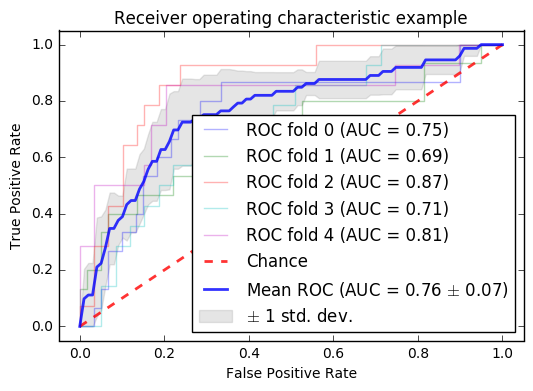

In [53]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis
X = X_M
y = Y_M
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = AdaBoostClassifier(n_estimators=55)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# ROC Chart of Chi2-Adaboost

Automatically created module for IPython interactive environment
Size of Selected Subset of Features ============ (368, 5)


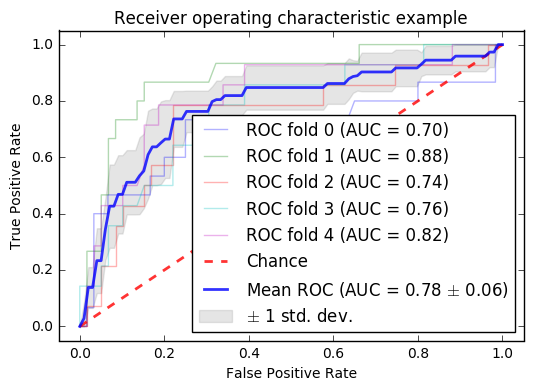

In [54]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis
X_FS = SelectKBest(chi2, k=5).fit_transform(X_M, Y_M)
print("Size of Selected Subset of Features ============", X_FS.shape)

X = X_FS
y = Y_M
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = AdaBoostClassifier(n_estimators=37)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Creating Features Subsets (Table 7 of Paper)

In [56]:
K = range(1, 9)
for k in K:
    model_FS = SelectKBest(chi2, k=k)
    X_FS = model_FS.fit_transform(X_M, Y_M)
    #print("Size of Selected Subset of Features ============", X_FS.shape)
    S1=model_FS.get_support()
    print(S1)

[False False  True False False False False False False]
[ True False  True False False False False False False]
[ True False  True False False False False  True False]
[ True  True  True False False False False  True False]
[ True  True  True  True False False False  True False]
[ True  True  True  True False  True False  True False]
[ True  True  True  True  True  True False  True False]
[ True  True  True  True  True  True  True  True False]
